In [1]:
from rasterio.enums import Resampling
import rioxarray
import geojson
from geojson import Point, Feature, FeatureCollection, dump
import geopandas
import requests
import numpy as np
import os
%load_ext autoreload
%autoreload 2

In [2]:
os.chdir("../")

In [18]:
from process_bathymetry_geojson import ProcessBathymetryGeoJson

In [23]:
p = ProcessBathymetryGeoJson()

In [24]:
p.open_clip_data()

Xarray shape before clip: (1, 10800, 21600)
Xarray shape after clip: (1, 2400, 3000)


In [25]:
p.downscale_data()

Xarray shape before downsample: (1, 2400, 3000)
Xarray shape after downsample 0.125 times: (1, 300, 375)


In [26]:
p.save_tif_data()

In [16]:
xds = rioxarray.open_rasterio(
    "data/bathymetry.tif",
    masked=True,
)

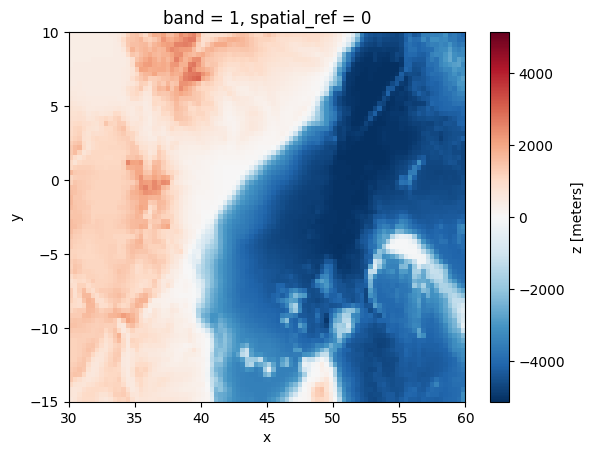

In [17]:
xds.plot()

In [15]:
!rio info data/bathymetry.tif

{"blockysize": 22, "bounds": [29.999999999999993, -14.999999999999986, 59.999999999999986, 10.000000000000007], "colorinterp": ["gray"], "count": 1, "crs": "EPSG:4326", "descriptions": ["z"], "driver": "GTiff", "dtype": "float32", "height": 75, "indexes": [1], "interleave": "band", "lnglat": [44.999999999999986, -2.4999999999999893], "mask_flags": [["nodata"]], "nodata": -99999.0, "res": [0.33333333333333326, 0.33333333333333326], "shape": [75, 90], "tiled": false, "transform": [0.33333333333333326, 0.0, 29.999999999999993, 0.0, -0.33333333333333326, 10.000000000000007, 0.0, 0.0, 1.0], "units": [null], "width": 90}


In [9]:
p.xds.values

array([[[  395.84662,   397.80118,   397.12445, ..., -3611.8162 ,
         -3860.7053 , -4095.852  ],
        [  391.08322,   391.23026,   391.8314 , ..., -3623.2092 ,
         -3906.5095 , -3898.     ],
        [  391.2494 ,   392.1649 ,   393.00327, ..., -3553.866  ,
         -3752.2878 , -3644.8896 ],
        ...,
        [  650.177  ,   629.22565,   648.01935, ..., -3976.9106 ,
         -3935.7048 , -3581.2607 ],
        [  679.62067,   616.7277 ,   772.4614 , ..., -4003.0396 ,
         -3950.4102 , -3196.3418 ],
        [  595.94635,   668.5995 ,   869.8316 , ..., -3983.6895 ,
         -3873.3933 , -3216.9697 ]]], dtype=float32)

In [116]:
p.save_asc_data()

In [117]:
p.save_geojson_data()

In [27]:
p.upload_jasmine(extension='tif')

upload done


In [22]:
p.xds.shape

(1, 100, 100)

In [26]:
p.output.split('.')

['bathymetry', 'asc']

In [22]:
xds = rioxarray.open_rasterio("data/ETOPO_2022_v1_60s_N90W180_bed.nc")
xds_1 = xds.copy().where(xds.y > -14, drop=True).where(xds.y < 5, drop=True).where(xds.x > 40, drop=True).where(xds.x < 55, drop=True)
xds_1

<xarray.DataArray 'z' (band: 1, y: 1140, x: 900)>
array([[[ 1128.4567 ,  1112.0853 ,  1169.7233 , ..., -5110.3125 ,
         -5104.875  , -5091.75   ],
        [ 1109.2787 ,  1058.6888 ,  1130.6056 , ..., -5094.375  ,
         -5097.4375 , -5105.625  ],
        [ 1059.3313 ,  1038.5292 ,  1109.7834 , ..., -5089.875  ,
         -5082.875  , -5102.125  ],
        ...,
        [  285.44272,   279.4418 ,   290.42184, ..., -4493.1523 ,
         -4498.92   , -4506.339  ],
        [  294.12546,   275.16763,   266.83505, ..., -4506.8423 ,
         -4502.7075 , -4512.989  ],
        [  291.40652,   273.9695 ,   263.3959 , ..., -4521.061  ,
         -4512.1626 , -4523.879  ]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * x        (x) float64 40.01 40.02 40.04 40.06 ... 54.94 54.96 54.97 54.99
  * y        (y) float64 4.992 4.975 4.958 4.942 ... -13.94 -13.96 -13.97 -13.99
    crs      int64 0
Attributes: (12/23)
    lat#long_name:                  latitude
    lat#standard_name:              latitude
    lat#units:                      degrees_north
    lon#long_name:                  longitude
    lon#standard_name:              longitude
    lon#units:                      degrees_east
    ...                             ...
    units:                          meters
    vert_crs_epsg:                  EPSG:3855
    vert_crs_name:                  EGM2008
    _FillValue:                     -99999.0
    scale_factor:                   1.0
    add_offset:                     0.0

In [23]:
xds.rio.crs

CRS.from_epsg(4326)

In [24]:
xds_1.rio.crs

In [19]:
xds.shape

(1, 10800, 21600)

In [4]:
downscale_factor = 1/12

new_width = xds.rio.width * downscale_factor
new_height = xds.rio.height * downscale_factor
 
#downsample raster
xds_down_sampled = xds.rio.reproject(xds.rio.crs, shape=(int(new_height), int(new_width)), resampling=Resampling.bilinear)
xds_down_sampled

<xarray.DataArray 'z' (band: 1, y: 900, x: 1800)>
array([[[-4214.1416  , -4214.28    , -4214.297   , ..., -4212.9336  ,
         -4213.2524  , -4213.447   ],
        [-4228.232   , -4227.574   , -4226.838   , ..., -4229.85    ,
         -4229.631   , -4229.185   ],
        [-4179.292   , -4173.7417  , -4163.615   , ..., -4186.8223  ,
         -4186.3467  , -4184.3926  ],
        ...,
        [  479.1488  ,   493.5372  ,   508.77682 , ...,   428.6302  ,
           444.68347 ,   459.74756 ],
        [  119.88735 ,   120.189674,   120.523994, ...,   118.975044,
           119.25884 ,   119.51582 ],
        [   27.378826,    26.994942,    26.571182, ...,    28.87574 ,
            28.37701 ,    27.925945]]], dtype=float32)
Coordinates:
  * x        (x) float64 -179.9 -179.7 -179.5 -179.3 ... 179.3 179.5 179.7 179.9
  * y        (y) float64 89.9 89.7 89.5 89.3 89.1 ... -89.3 -89.5 -89.7 -89.9
  * band     (band) int64 1
    crs      int64 0
Attributes: (12/23)
    lat#long_name:                  latitude
    lat#standard_name:              latitude
    lat#units:                      degrees_north
    lon#long_name:                  longitude
    lon#standard_name:              longitude
    lon#units:                      degrees_east
    ...                             ...
    units:                          meters
    vert_crs_epsg:                  EPSG:3855
    vert_crs_name:                  EGM2008
    scale_factor:                   1.0
    add_offset:                     0.0
    _FillValue:                     -99999.0

In [10]:
xds_down_sampled.to_numpy()[0].astype(int)

array([[-4214, -4214, -4214, ..., -4212, -4213, -4213],
       [-4228, -4227, -4226, ..., -4229, -4229, -4229],
       [-4179, -4173, -4163, ..., -4186, -4186, -4184],
       ...,
       [  479,   493,   508, ...,   428,   444,   459],
       [  119,   120,   120, ...,   118,   119,   119],
       [   27,    26,    26, ...,    28,    28,    27]])

In [9]:
np.around(xds_down_sampled.to_numpy()[0], decimals=-1)

array([[-4210., -4210., -4210., ..., -4210., -4210., -4210.],
       [-4230., -4230., -4230., ..., -4230., -4230., -4230.],
       [-4180., -4170., -4160., ..., -4190., -4190., -4180.],
       ...,
       [  480.,   490.,   510., ...,   430.,   440.,   460.],
       [  120.,   120.,   120., ...,   120.,   120.,   120.],
       [   30.,    30.,    30., ...,    30.,    30.,    30.]],
      dtype=float32)

In [17]:
round(float(xds_down_sampled.y[0] - xds_down_sampled.y[1]), 1)

0.2

In [18]:
header = f"ncols     {int(xds_down_sampled.rio.height)}\n"
header += f"nrows    {int(xds_down_sampled.rio.width)}\n"
header += f"xllcorner {float(xds_down_sampled.x[0])}\n"
header += f"yllcorner {float(xds_down_sampled.y[0])}\n"
header += f"cellsize {round(float(xds_down_sampled.y[0] - xds_down_sampled.y[1]), 1)}\n"
header += f"NODATA_value {-9999}"

np.savetxt("../data/bathymetry.asc", xds_down_sampled.to_numpy()[0].astype(int), \
header=header, fmt="%1.0f", comments='')

In [3]:
features = []
for i, y in enumerate(xds.y.values):
    for j, x in enumerate(xds.x.values):
        point = Point((y, x))
        feature = Feature(geometry=point,  properties = {'depth': int(xds.values[0][i][j].round(0))})
        features.append(feature)

In [4]:
features[0]

{"geometry": {"coordinates": [4.991667, 40.008333], "type": "Point"}, "properties": {"depth": 1128}, "type": "Feature"}

In [5]:
feature_collection = FeatureCollection(features)
with open('bathymetry.geojson', 'w') as f:
   dump(feature_collection, f)

In [5]:
ogr = gdaltools.ogr2ogr()

In [6]:
ogr.set_input("myfile_3.geojson", srs="EPSG:3857")
ogr.set_output("myfile_7.geojson", srs="EPSG:4326")
ogr.execute()

b''

In [ ]:
conn = gdaltools.PgConnectionString(host="localhost", port=5432, dbname="scolab", schema="data", user="myuser", password="mypass")
ogr.set_input(conn, table_name="roads", srs="EPSG:4326")
ogr.set_output("mydb.sqlite", srs="EPSG:25830")
ogr.execute()

In [41]:
import geojson
with open(url_file) as f:
    gj = geojson.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'https://ows.emodnet-seabedhabitats.eu/geoserver/emodnet_open/wfs?SERVICE=WFS&request=getFeature&VERSION=2.0.0&typeName=emodnet_open:eusm2021_bio_full&outputFormat=application/json'